# Fitting CsgC inhibitor parameters

In this notebook, we will derive a numerical model for the inhibitor CsgC based on an article by <a href="https://www.nature.com/articles/srep24656#Sec24">J. D. Taylor <i> et. al.</i></a>. In the article, the aggregation of CsgA monomers <i>in-vitro</i> was investigated using various techniques. They conclude that CsgC is not depleted during aggregation and that CsgC inhibitos both CsgA elongation and nucleation. 

Indeed, for a CsgC:CsgA concentration ratio of 1:400, they find that elongation and nucleation is inhibited in the ratio 5:3:
$$\frac{k_{n0}}{k_n}/\frac{k_{+0}}{k_+} = \frac{5}{3}$$
where $k_+$ is the inhibited elongation rate, $k_n$ is the inhibited nucleation rate, and $i_0$ marks uninhibited reaction rates.

When looking at the reaction kinetics, they fit and monitor the change of a parameter $k_c = k_+ k_n$. Initially, they fit the parameter against uninhibited Curli formation to get $k_{c0} = 7850M^{-1}h^{-2}$. We will mainly use data from an experiment series where CsgC concentration was varied and the change in the parameter $k_c$ was monitored (Figure 4 in the article). In their experiment, they used a CsgA concentration of $5\mu M$ and they varied CsgC at the range of substoichiometric ratios 0:1 to 1:150 (CsgC:CsgA). 

We extracted the data from the inset figure that shows the relative reaction rate against the CsgC subtoichiometric ratio to get the following data: 

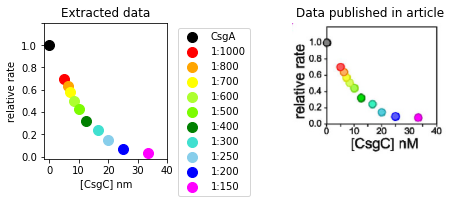

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import display, Math, Latex, Image

reaction_ratios = np.array([1,0.7, 0.63, 0.58, 0.5, 0.43, 0.32, 0.24,
                  0.15, 0.07, 0.03])
concentration_ratios = np.array([0,1/1000, 1/800, 1/700, 1/600, 1/500,
                      1/400, 1/300, 1/250, 1/200, 1/150])

palette = ['black', 'red','orange', 'yellow', 'greenyellow', 'lawngreen', 'green', 'turquoise', 'skyblue', 'blue', 'magenta']
fig,axs = plt.subplots(1,3, figsize=(7.5, 2.5), gridspec_kw={'width_ratios': [2,1,3]})
for ind, crrr in enumerate(zip(concentration_ratios, reaction_ratios)):
    cr, rr = crrr
    if cr == 0:
        axs[0].scatter([0],[1], s=100, label='CsgA', c=palette[ind])
    else:
        axs[0].scatter([cr*5000], rr, s=100,label=f'1:{int(1/cr)}', c=palette[ind])
axs[0].set_ylabel('relative rate')
axs[0].set_xlabel('[CsgC] nm')
axs[0].set_xticks([0,10,20,30,40])
axs[0].set_yticks([0.0,0.2,0.4,0.6,0.8,1.0, 1.2])
axs[0].set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0,''])
axs[0].legend(bbox_to_anchor=(1.05, 1))
axs[0].set_title('Extracted data')
axs[1].axis('off')
img = mpimg.imread('../images/relative reaction rate against CsgC concentration.png')
imgplot = axs[2].imshow(img, interpolation='nearest')
axs[2].axis('off')
axs[2].set_title('Data published in article')

plt.show()

Let's say we now have a function $ R(r)$ that describes the relationship between the relative reaction rate $R = \frac{k_c}{k_{c0}}$ and the concentration ratio $r=\frac{[CsgC]}{[CsgA]}$. Given that the inhibition ratio remains 5:3 for all concentration ratios, we can derive the following equation for the inhibition of elongation $k_+$: 
$$R(r) = \frac{k_c}{k_{c0}} = \frac{k_+k_n}{k_c0} = \frac{3}{5} \frac{k_+}{k_{c0}} \frac{k_{n0} k_+}{k_{+0}} = \frac{3}{5} \left( \frac{k_+}{k_{+0}}\right)^2$$

In an article by <a href="https://www.nature.com/articles/ncomms10948#Sec14">P. Arosio <i> et. al.</i></a>, the analytical function describing chaperone inhbition of amyloid formation was discussed. They derived the following equations for the inhibited rate constants when the chaperone inhibits primary nucleation:
$$k_{n}/k_{n0} = \frac{1}{(1+C_1 r)^2}$$
$$k_{+}/k_{+0} = \frac{1}{1+C_1 r}$$
And when the chaperone inhibits elongation:
$$k_{+}/k_{+0} = \frac{2 + C_2 r}{2 + 2 C_2 r + 2 (C_2 r)^2}$$
, where $C_1$ and $C_2$ are constants describing monomer-chaperone and fibril-chaperone binding.

CsgC has been reported to inhibit both elongation and primary nucleation. Merging the two expressions gives us the following expression for $R(r)$:
$$R(r) = \frac{k_c}{k_{c0}} = \frac{k_+k_n}{k_{+0}k_{n0}} = \frac{1}{(1+C_1 r)^3} \frac{2 + C_2 r}{2 + 2 C_2 r + 2 (C_2 r)^2}$$
This simple function is easily fitted against the data. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

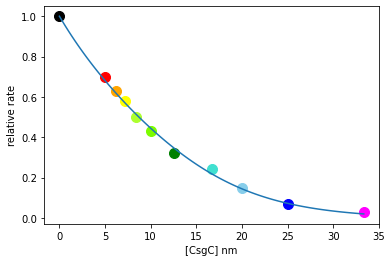

In [38]:
from scipy.optimize import curve_fit

def R(r, C1, C2):
    return  1/(1+C1*r)**3*(2+C2*r)/(2+2*C2*r+2*C2**2*r**2)

popt, _ = curve_fit(R, concentration_ratios, reaction_ratios)
display(Latex('C_1 = %s ' %(int(popt[0]))))
display(Latex('C_2 = %s' %(int(popt[1]))))

for ind, crrr in enumerate(zip(concentration_ratios, reaction_ratios)):
    cr, rr = crrr
    if cr == 0:
        plt.scatter([0],[1], s=100, label='CsgA', c=palette[ind])
    else:
        plt.scatter([cr*5000], rr, s=100,label=f'1:{int(1/cr)}', c=palette[ind])

xvals = np.linspace(0,max(concentration_ratios), 100)
plt.plot(xvals*5000, R(xvals, popt[0], popt[1]), label = 'R(r)')
plt.ylabel('relative rate')
plt.xlabel('[CsgC] nm')
plt.show()

We can now derive the inibited elongation rate as a function of the CsgA to CsgC ratio, and the uninhibited elongation rate:
$$\frac{k_+}{k_{+0}} = \sqrt{\frac{5}{3}R(r)}$$
for $r = [CsgC] / [CsgA]$ and $k_{+0} = 1.6*10^6$.